In [ ]:
import pandas as pd

DATA_PATH = 'data.csv'

df = pd.read_csv(DATA_PATH, encoding='latin1')
df.head()

In [ ]:
df.dtypes

In [ ]:
# Removendo os valores NaN e convertendo CustomerID para inteiro
df.dropna(inplace=True)
df['CustomerID'] = df['CustomerID'].astype('int64')

In [ ]:
# Cada 'StockCode' referencia uma única 'Description' correspondente, não sendo necessário utilizar as duas colunas
df.groupby('StockCode')['Description'].unique()

In [ ]:
df.drop(columns=['Description'], inplace=True)

In [ ]:
# Criando uma coluna com o gasto total, e removendo o preço e a quantidade (utilizados para o cálculo)
df['TotalCharge'] = df['Quantity'] * df['UnitPrice']
df.drop(columns=['Quantity', 'UnitPrice'], inplace=True)

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(df['TotalCharge']).boxplot()
plt.show()

In [ ]:
# Valores abaixo de 4000 e não negativos descrevem melhor os grupos de clientes por gasto
pd.DataFrame(df[(df['TotalCharge'] < 4000) & (df['TotalCharge'] > 0)]['TotalCharge']).boxplot()
plt.show()

In [ ]:
df = pd.DataFrame(df[(df['TotalCharge'] < 4000) & (df['TotalCharge'] > 0)]).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convertendo as variáveis categóricas para representações numéricas
df['InvoiceNo'] = le.fit_transform(df['InvoiceNo'])
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Country']   = le.fit_transform(df['Country'])

In [ ]:
from sklearn.cluster import KMeans, k_means
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# A coluna normalizada prediz a clusterização
df['TotalCharge_scaled'] = ss.fit_transform(df[['TotalCharge']])

# O k encontra o melhor score no valor 3
model = KElbowVisualizer(KMeans(), k=6)
model.fit(pd.concat([df['TotalCharge_scaled'], df['CustomerID']], axis=1))
model.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

kmeans                    = KMeans(n_clusters=3) # k=3 como melhor opção
df['Cluster_TotalCharge'] = kmeans.fit_predict(df[['TotalCharge_scaled']])

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)
sns.scatterplot(data=df, x='CustomerID', y='TotalCharge', hue='Cluster_TotalCharge', **scatter_kwargs)
plt.xlabel('CustomerID')
plt.ylabel('TotalCharge')
plt.title('Clusters de Clientes por TotalCharge')
plt.show()

In [ ]:
# Visualização da média dos valores do 'TotalCharge' e da quantidade de clientes para cada Cluster
pd.concat([df.groupby('Cluster_TotalCharge')['TotalCharge'].mean().reset_index().rename(columns={'TotalCharge': 'TotalCharge_mean'}),
          df.groupby('Cluster_TotalCharge')['TotalCharge'].count().reset_index().rename(columns={'TotalCharge': 'TotalCharge_count'})['TotalCharge_count']],
          axis=1)

O insight que pode-se tirar da clusterização do 'TotalCharge' é que existem três faixas de gastos principais
praticadas pelos clientes, com com uma quantidade muito maior dos que gastam menores valores.
A ação em resposta pode ser investir em marketing para aumentar as vendas para os clientes que gastam menos.

In [ ]:
# Conversão do InvoiceDate para tipo datetime64[ns]
df['InvoiceDate']        = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')
df['InvoiceDate_scaled'] = ss.fit_transform(df[['InvoiceDate']])

# O k encontra o melhor score no valor 3
model = KElbowVisualizer(KMeans(), k=4)
model.fit(pd.concat([df['InvoiceDate_scaled'], df['CustomerID']], axis=1))
model.show()

In [ ]:
kmeans                    = KMeans(n_clusters=4) # k=4 como melhor opção
df['Cluster_InvoiceDate'] = kmeans.fit_predict(df[['InvoiceDate_scaled']])

sns.scatterplot(data=df, x='CustomerID', y='InvoiceDate', hue='Cluster_InvoiceDate', **scatter_kwargs)
plt.xlabel('CustomerID')
plt.ylabel('Data')
plt.title('Clusters de Clientes por Data')
plt.show()

In [ ]:
# Visualização da média dos valores do 'InvoiceDate' e da quantidade de clientes para cada Cluster
pd.concat([df.groupby('Cluster_InvoiceDate')['InvoiceDate'].mean().reset_index().rename(columns={'InvoiceDate': 'InvoiceDate_mean'}),
          df.groupby('Cluster_InvoiceDate')['InvoiceDate'].count().reset_index().rename(columns={'InvoiceDate': 'InvoiceDate_count'})['InvoiceDate_count']],
          axis=1)

O insight das datas é que as vendas subiram na época mais próxima a 2011-04-09, e apesar de se manterem em um nível maior que o início em
2010-05-28, as vendas tiveram uma tendência de queda para 2011-09-26.
A ação é entender o que ocorreu neste período que possa ter prejudicado os resultados.

In [ ]:
# O k encontra o melhor score no valor 4
model = KElbowVisualizer(KMeans(), k=4)
model.fit(pd.concat([df['StockCode'], df['CustomerID']], axis=1))
model.show()

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


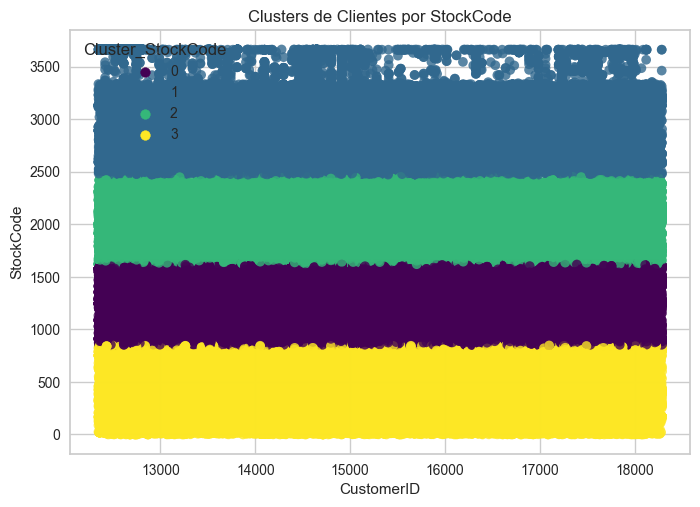

In [23]:
kmeans                    = KMeans(n_clusters=4) # k=4 como melhor opção
df['Cluster_StockCode'] = kmeans.fit_predict(df[['StockCode']])

sns.scatterplot(data=df, x='CustomerID', y='StockCode', hue='Cluster_StockCode', **scatter_kwargs)
plt.xlabel('CustomerID')
plt.ylabel('StockCode')
plt.title('Clusters de Clientes por StockCode')
plt.show()

O insight dos grupos de produtos comprados pelos clientes pode sugerir quais os produtos de preferência para cada um.
A ação a partir disto pode ser duas: i. Direcionar o Marketing de produtos que os clientes ainda não consomem, para que eles
passem a comprar também outro produto; ii. Reforçar o Marketing de produtos que os clientes já compram, e talvez até lançar
promoções para que eles continuem comprando, em uma espécie de "fidelização".